In [1]:
import dask.dataframe as df

## Data Source

Data downloaded from : https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory

also see https://data.seattle.gov/Community/Integrated-Library-System-ILS-Data-Dictionary/pbt3-ytbc

### Code to load the data and break into manageable csv

In [2]:
data_path="/Users/alexiuk/projects/data/kaggle/seattle-library/"
# library_df = df.read_csv(data_path + 'library-collection-inventory.csv')
# library_df.to_csv('broken_csvs/libary-part-*.csv')

In [3]:
library_df = df.read_csv(data_path + 'broken_csvs/libary-part-0[0-2]*.csv')

In [4]:
library_df

,Unnamed: 0,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
npartitions=30,,,,,,,,,,,,,,
,int64,int64,string,string,string,string,string,string,string,string,string,string,string,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
# Currently in 1.2.1 inplace arguement is not supported
library_df = library_df.drop('Unnamed: 0', axis=1)

In [6]:
library_df.npartitions

30

In [7]:
group_publication_year = library_df.groupby('PublicationYear').count().compute()

In [8]:
group_publication_year.shape
print(group_publication_year[1975:1985])

                 BibNum  Title  Author  ISBN  Publisher  Subjects  ItemType  \
PublicationYear                                                               
2007, c1989.         96     96      96    96         96        96        96   
2007, c1990.         29     29      29    29         29        29        29   
2007, c1991.         22     22      22    22         22        22        22   
2007, c1992.         48     48      42    48         48        48        48   
2007, c1993.         39     39      39    39         39        39        39   
2007, c1994.         76     76      48    76         76        76        76   
2007, c1996.         98     98      51    98         98        98        98   
2007, c1997.        102    102      90   102        102       102       102   
2007, c1998.        124    124     124   124        124       124       124   
2007, c1999.         23     23      23    23         23        23        23   

                 ItemCollection  FloatingItem  Item

In [9]:
library_df.head(n=100)

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,<NA>,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,<NA>,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,<NA>,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",<NA>,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,<NA>,cen,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2935743,Angry birds playground : dinosaurs : a prehist...,"Esbaum, Jill","1426313241, 142631325X, 9781426313240, 9781426...",c2013.,"National Geographic,","Dinosaurs Juvenile literature, Fossils Juvenil...",jcbk,ncnf,<NA>,col,2017-09-01T00:00:00.000,1
96,2566973,Poppy and Ereth / Avi ; illustrated by Brian F...,"Avi, 1937-","0061119695, 0061119709, 9780061119699, 9780061...",2009.,"HarperCollinsPublishers,","White footed mouse Fiction, Mice Juvenile fict...",jcbk,ncfic,<NA>,net,2017-09-01T00:00:00.000,1
97,441852,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,acmus,camus,<NA>,cen,2017-09-01T00:00:00.000,1
98,2900921,Al Capone does my homework / Gennifer Choldenko.,"Choldenko, Gennifer, 1957-","0803734727, 9780803734722",c2013.,"Dial Books for Young Readers,",United States Penitentiary Alcatraz Island Cal...,jcbk,ccfic,<NA>,cen,2017-09-01T00:00:00.000,1


In [10]:
group_author = library_df.groupby('Author')["ItemCount"].sum()

In [11]:
%time group_author.compute()

CPU times: user 17.3 s, sys: 2.72 s, total: 20 s
Wall time: 14.3 s


Author
!!! (Musical group)                            90
"Avion,", pseud.                                9
'N Sync (Musical group)                         8
(Alina Iosifovna)                               9
-Ky                                             4
                                               ..
Woolner, David B., 1955-                        1
Wright, Louis B. (Louis Booker), 1899-1984,     1
Yulinglaoren, active 18th century,,             1
Zabus, Vincent, 1971-                           2
ʾIyob ʾAbāta ʾEndāla,                           1
Name: ItemCount, Length: 239639, dtype: int64

In [12]:
import re

def get_year(year_str, *args, **kwargs):
    if isinstance(year_str, str):
        year_list = list(map(lambda x: re.sub(r"\D", "", x), year_str.split(',')))
        return list(map(lambda x: int(x) if x!='' else 0, year_list))
    else:
        return year_str

In [13]:
publication_dates = library_df['PublicationYear'].apply(get_year,
                                                        axis=1,
                                                       meta=('PublicationYear', object))

In [14]:
publication_dates

Dask Series Structure:
npartitions=30
    string
       ...
     ...  
       ...
       ...
Name: PublicationYear, dtype: string
Dask Name: to_pyarrow_string, 6 graph layers

In [15]:
publication_dates.compute()

0               [2014]
1         [2003, 1999]
2               [2014]
3               [1999]
4         [1991, 1988]
              ...     
197623          [1951]
197624          [1995]
197625          [2006]
197626          [2011]
197627          [2015]
Name: PublicationYear, Length: 5854408, dtype: string

In [16]:
get_lens = publication_dates.map(lambda x: len(x) if isinstance(x, list) else 0)

In [17]:
get_lens.value_counts().compute()

PublicationYear
0    5854408
Name: count, dtype: int64

In [18]:
def get_first_published_year(year_list, *args, **kwargs):
    if isinstance(year_list, int):
        if year_list==0:
            return 0
        else:
            return year_list
    elif isinstance(year_list, list):
        return min(year_list)
    else:
        return 0

In [19]:
first_pub_year = publication_dates.apply(
    lambda row: get_first_published_year(row), meta=('PublicationYear', 'int')).astype(int)

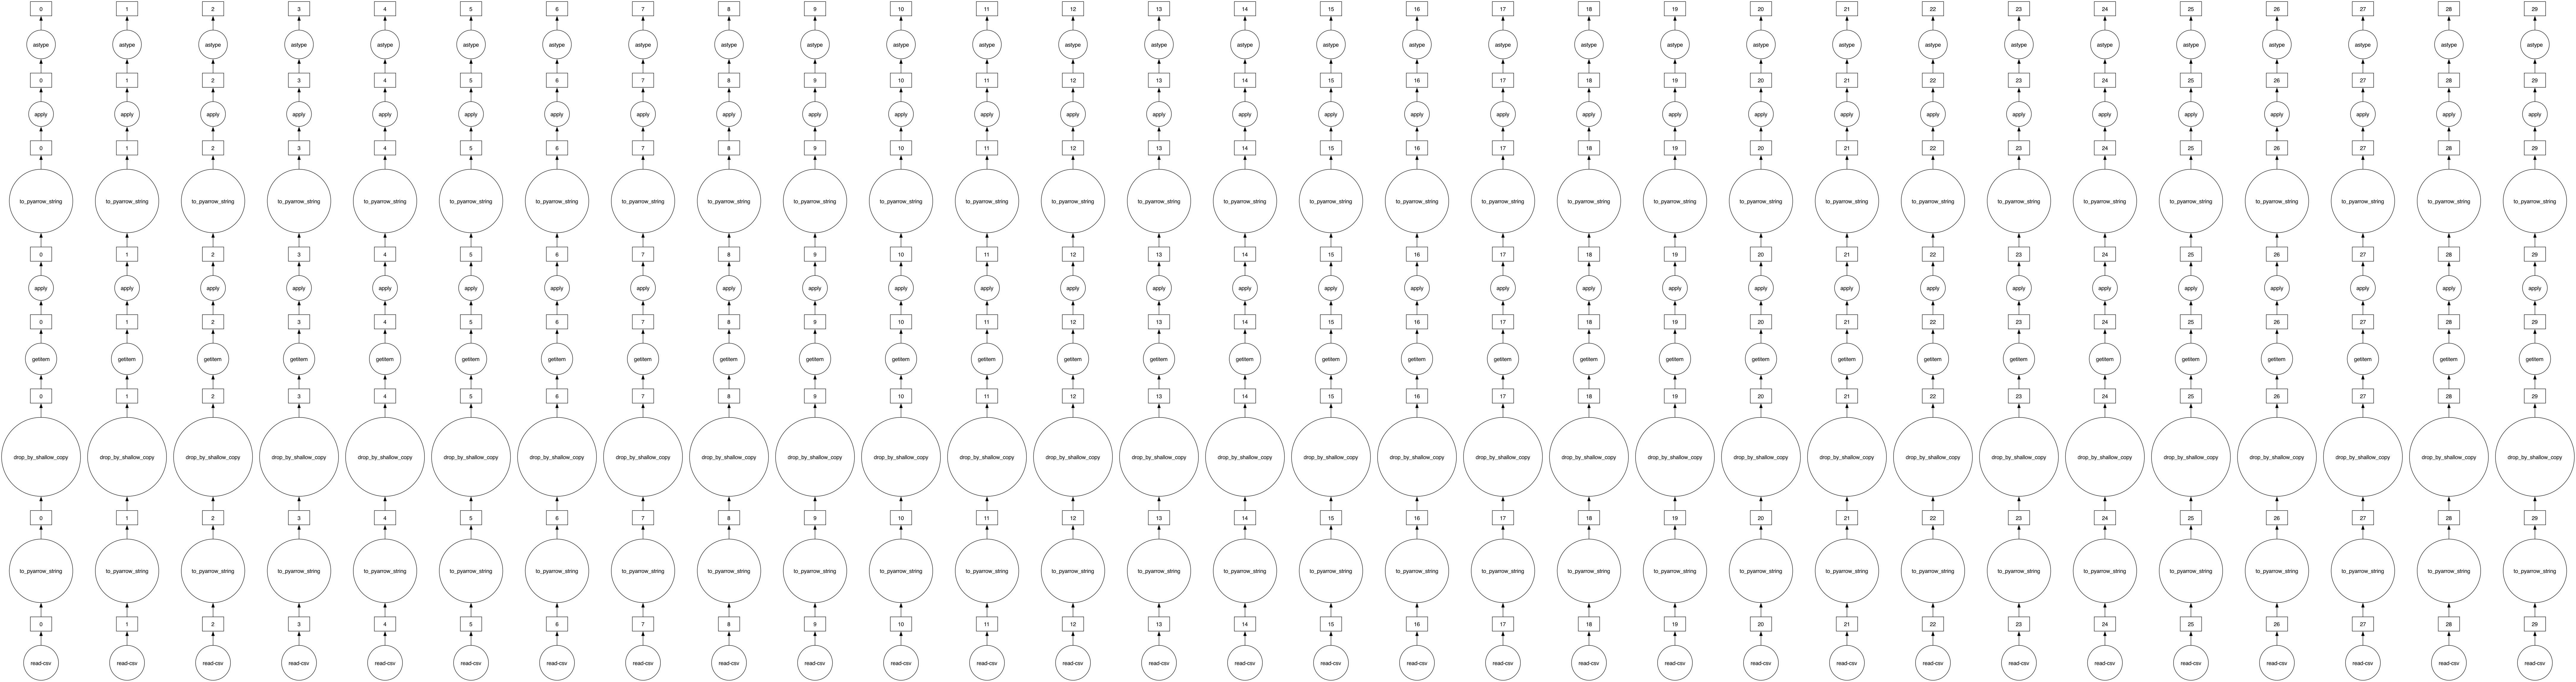

In [20]:
first_pub_year.visualize(filename='pub_year.png')

In [21]:
first_pub_year.compute()

0         0
1         0
2         0
3         0
4         0
         ..
197623    0
197624    0
197625    0
197626    0
197627    0
Name: PublicationYear, Length: 5854408, dtype: int64

In [22]:
year_count = first_pub_year.value_counts()

In [23]:
year_count.nlargest(50).compute()

PublicationYear
0    5854408
Name: count, dtype: int64

In [24]:
import dask.bag as db

subjects_bag = library_df['Subjects'].to_bag()

In [25]:
subjects_bag.take(10)

('Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc, Teenagers United States Comic books strips etc, Parent and teenager Comic books strips etc, Families Comic books strips etc, Comic books strips etc, Comics Graphic works, Humorous comics',
 'Hemingway Ernest 1899 1961 Fiction, Biographical fiction, Historical fiction',
 'Erotic literature American, American literature 20th century',
 'Political atrocities Cambodia, Children Cambodia Biography, Cambodia History 1975',
 'Berger Elmer 1908 1996, Zionism Controversial literature',
 'Man woman relationships Fiction, Betrothal Fiction, Governesses Fiction, Highlands Scotland Fiction, Romance fiction, Historical fiction',
 'Survival Juvenile fiction, Islands Juvenile fiction, Dystopias Juvenile fiction, F

In [26]:
flatten_subjects = subjects_bag.map(lambda x: x.split(',')).flatten()

In [27]:
flatten_subjects.take(10)

('Musicians Fiction',
 ' Bullfighters Fiction',
 ' Best friends Fiction',
 ' Friendship Fiction',
 ' Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc',
 ' Comic books strips etc Japan Translations into English',
 ' Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc',
 ' Teenagers United States Comic books strips etc')

In [28]:
import numpy
clean_subjects = flatten_subjects.map(lambda x: x.strip())

In [29]:
clean_subjects.take(10)

('Musicians Fiction',
 'Bullfighters Fiction',
 'Best friends Fiction',
 'Friendship Fiction',
 'Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc',
 'Comic books strips etc Japan Translations into English',
 'Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc',
 'Teenagers United States Comic books strips etc')

In [30]:
freq_subjects = clean_subjects.frequencies()

In [31]:
freq_subjects

df = clean_subjects.to_dataframe(columns=['Subjects'])

In [32]:
# expect an error here. see how its resolved in next cell
freq_subjects.compute()

AttributeError: 'NAType' object has no attribute 'split'

In [ ]:
remove_nan = subjects_bag.filter(lambda x: isinstance(x, str))
flatten_subjects = remove_nan.map(lambda x: x.split(',')).flatten()
clean_subjects = flatten_subjects.map(lambda x: x.strip())
freq_subjects = clean_subjects.frequencies()

In [ ]:
freq_subjects.take(10)

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

(('Musicians Fiction', 1625),
 ('Bullfighters Fiction', 99),
 ('Best friends Fiction', 13410),
 ('Friendship Fiction', 88239),
 ('Adventure and adventurers Fiction', 28465),
 ('Ninja Japan Comic books strips etc', 671),
 ('Comic books strips etc Japan Translations into English', 9155),
 ('Graphic novels', 210795),
 ('Duncan Jeremy Fictitious character Comic books strips etc', 24),
 ('Teenagers United States Comic books strips etc', 62))

In [ ]:
remove_nan.take(5)

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


('Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc, Teenagers United States Comic books strips etc, Parent and teenager Comic books strips etc, Families Comic books strips etc, Comic books strips etc, Comics Graphic works, Humorous comics',
 'Hemingway Ernest 1899 1961 Fiction, Biographical fiction, Historical fiction',
 'Erotic literature American, American literature 20th century')